**Loading the required packages**

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading the data**

In [2]:
hr = pd.read_csv('HR Scalene Works.csv')
hr.head()

,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,1
1,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,1
2,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,1
3,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,1
4,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,1


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate.Ref                9011 non-null   int64  
 1   DOJ.Extended                 9011 non-null   object 
 2   Duration.to.accept.offer     9011 non-null   int64  
 3   Notice.period                9011 non-null   int64  
 4   Offered.band                 9011 non-null   object 
 5   Pecent.hike.expected.in.CTC  9011 non-null   float64
 6   Percent.hike.offered.in.CTC  9011 non-null   float64
 7   Percent.difference.CTC       9011 non-null   float64
 8   Joining.Bonus                9011 non-null   object 
 9   Candidate.relocate.actual    9011 non-null   object 
 10  Gender                       9011 non-null   object 
 11  Candidate.Source             9011 non-null   object 
 12  Rex.in.Yrs                   9011 non-null   int64  
 13  LOB               

Lets remove the Candidate Reference, Expected hike, Offered Hike Columns 

In [4]:
hr = hr.iloc[:,1:17]

In [5]:
hr = hr.drop('Pecent.hike.expected.in.CTC',axis=1)

In [6]:
hr = hr.drop('Percent.hike.offered.in.CTC',axis=1)

In [7]:
train_x,test_x,train_y,test_y=train_test_split(hr.iloc[:,:-1],hr.iloc[:,-1],test_size=0.2,random_state=42)

Lets take the categorical variables and numerical features and perform one hot encoding to categorical variables

In [8]:
cat_fea = ['DOJ.Extended','Offered.band','Joining.Bonus','Candidate.relocate.actual','Gender','Candidate.Source','LOB','Location']
num_fea = ['Duration.to.accept.offer','Notice.period','Percent.difference.CTC','Rex.in.Yrs','Age']

In [9]:
for col in cat_fea:
    train_x[col] = train_x[col].astype('category')
    
for col in cat_fea:
    test_x[col] = test_x[col].astype('category')

In [10]:
train_x_cat = train_x[cat_fea].copy()
test_x_cat = test_x[cat_fea].copy()

In [11]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(train_x_cat)
train_x_cat = pd.DataFrame(ohe.transform(train_x_cat),columns=ohe.get_feature_names(train_x_cat.columns))

In [12]:
ohe.fit(test_x_cat)
test_x_cat = pd.DataFrame(ohe.transform(test_x_cat),columns=ohe.get_feature_names(test_x_cat.columns))

In [13]:
train_x[num_fea].shape

(7208, 5)

In [14]:
train_x_new = pd.concat([train_x[num_fea].reset_index(drop=True),train_x_cat],axis=1)
test_x_new = pd.concat([test_x[num_fea].reset_index(drop=True),test_x_cat],axis=1)

In [15]:
train_y = pd.DataFrame(train_y)

ohe.fit(train_y)

pd.DataFrame(ohe.transform(train_y),columns=ohe.get_feature_names(train_y.columns))

,Status_0,Status_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
7203,0.0,1.0
7204,0.0,1.0
7205,0.0,1.0
7206,0.0,1.0


In [16]:
## Drop the first level

ohe = OneHotEncoder(sparse=False,drop="first")

train_y = pd.DataFrame(train_y)

ohe.fit(train_y)

train_y = pd.DataFrame(ohe.transform(train_y),columns=ohe.get_feature_names(train_y.columns))

train_y.head()

,Status_1
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [17]:
test_y = pd.DataFrame(test_y)

test_y = pd.DataFrame(ohe.transform(test_y),columns=ohe.get_feature_names(test_y.columns))

test_y.head()

,Status_1
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


In [18]:
train_x = train_x_new.copy()

test_x = test_x_new.copy()

##**Random Forest Model**

In [19]:
np.random.seed(1)
rfc_50trees = RandomForestClassifier(n_estimators=50)
rfc_50trees

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rfc_50trees.fit(X = train_x,y = train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
## Predict on train and test
pred_train_50trees = rfc_50trees.predict(train_x)
pred_test_50trees = rfc_50trees.predict(test_x)

In [22]:
## Evaluation metrics on Train

print("Accuracy on train is:",accuracy_score(train_y,pred_train_50trees))

print("Recall on train is:",recall_score(train_y,pred_train_50trees))

print("F1 score on train is:",f1_score(train_y,pred_train_50trees))


Accuracy on train is: 0.9956992230854605
Recall on train is: 0.9988054607508532
F1 score on train is: 0.9973587799267274


In [23]:
## Evaluation metrics on Test

print("Accuracy on test is:",accuracy_score(test_y,pred_test_50trees))

print("Recall on test is:",recall_score(test_y,pred_test_50trees))

print("F1 Score on test is:",f1_score(test_y,pred_test_50trees))


Accuracy on test is: 0.819744869661675
Recall on test is: 0.9624829467939973
F1 Score on test is: 0.8967270416269463


In [24]:
confusion_matrix(train_y,pred_train_50trees)

array([[1324,   24],
       [   7, 5853]])

In [25]:
confusion_matrix(test_y,pred_test_50trees)

array([[  67,  270],
       [  55, 1411]])

##**Getting important features**

In [26]:
hr["Status"].value_counts(normalize=True)

1    0.813006
0    0.186994
Name: Status, dtype: float64

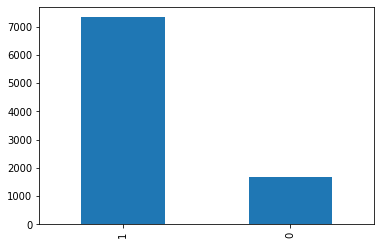

In [27]:
hr["Status"].value_counts().plot(kind='bar')

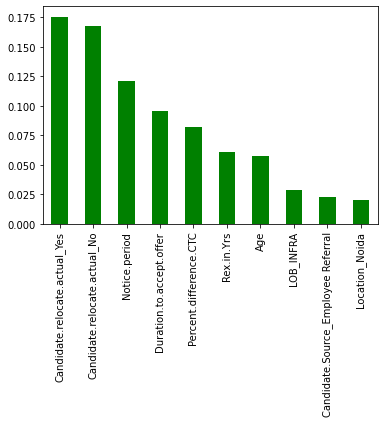

In [28]:
rfc_weights = RandomForestClassifier(n_estimators = 20,max_depth=10,min_samples_leaf=4, class_weight = {0 : 0.88, 1 : 0.12})
rfc_weights.fit(X = train_x, y = train_y)
feat_importances = pd.Series(rfc_weights.feature_importances_, index = train_x.columns)
feat_importances_ordered = feat_importances.nlargest(n=10)
feat_importances_ordered.plot(kind='bar',color='green')

# **While presenting this data to a management we can point out the imporant features for predicting the response of candidate**